<a href="https://colab.research.google.com/github/mauriziomontis/esercizi_datascience/blob/main/esercizio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reti Convolizionali

In [1]:
import torch.nn as nn
import torch

In [2]:
conv_layr = nn.Conv2d(
    in_channels=3,
    out_channels=32,
    kernel_size=3,
    padding=(1,1)
)

In [3]:
out = conv_layr(torch.randn(size=(32,3,100,100)))

In [4]:
out.shape

torch.Size([32, 32, 100, 100])

### LeNET 5


reference: https://www.wikiwand.com/en/articles/LeNet

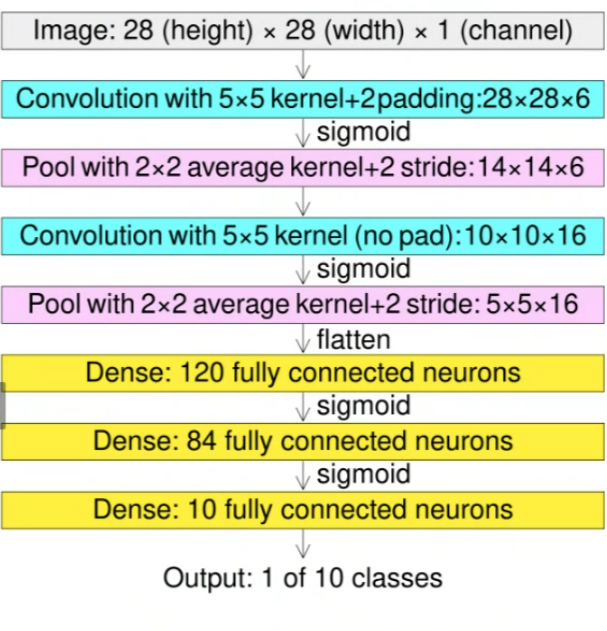


In [5]:
import torch.nn as nn
import torch

In [18]:
lenet = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.Sigmoid(),
    nn.AvgPool2d(2,2),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.Sigmoid(),
    nn.AvgPool2d(2,2),

    # Classificatore finale
    nn.Flatten(),               # (32,5,5,16)  --> (32, 400)
    nn.Linear(400, 120),
    nn.Sigmoid(),
    nn.Linear(120, 84),
    nn.Sigmoid(),
    nn.Linear(84, 10)

)

In [19]:
lenet(torch.randn(32,1,28,28)).shape

torch.Size([32, 10])

In [33]:
## Con funzioni lazy

lazylenet = nn.Sequential(
    nn.LazyConv2d(6, kernel_size=5, padding=2),
    nn.Sigmoid(),
    nn.AvgPool2d(2,2),
    nn.LazyConv2d(16, kernel_size=5),
    nn.Sigmoid(),
    nn.AvgPool2d(2,2),

    # Classificatore finale
    nn.Flatten(),               # (32,5,5,16)  --> (32, 400)
    nn.LazyLinear(120),
    nn.Sigmoid(),
    nn.LazyLinear(84),
    nn.Sigmoid(),
    nn.LazyLinear(10)

)

In [34]:
list(lazylenet.parameters())

[<UninitializedParameter>,
 <UninitializedParameter>,
 <UninitializedParameter>,
 <UninitializedParameter>,
 <UninitializedParameter>,
 <UninitializedParameter>,
 <UninitializedParameter>,
 <UninitializedParameter>,
 <UninitializedParameter>,
 <UninitializedParameter>]

In [35]:
lazylenet(torch.randn(32,1,28,28)).shape

torch.Size([32, 10])

In [51]:
import torchvision
import matplotlib.pyplot as plt
from torch.optim import Adam

In [47]:
from torch.nn.functional import relu, softmax, cross_entropy

In [43]:
trainset = torchvision.datasets.MNIST(root="mnist", train=True, download=True)
testset = torchvision.datasets.MNIST(root="mnist", train=False, download=True)

In [44]:
DEVICE = "cpu"

In [50]:
x_train = trainset.data.float() / 255
y_train = trainset.targets

In [54]:
epochs = 10
batch_size = 32
lr = 1e-3

optimizer = Adam(lazylenet.parameters(), lr=lr)

losses = []
counter = 0

for epoch in range(epochs):
  # scorro tutto il dataset a batch di batch_size
  for i in range(0, len(x_train), batch_size):

    counter += 1
    # costruisco mini_batch
    x_batch = x_train[i:i+batch_size].to(DEVICE).reshape(-1,1,28,28)
    y_batch = y_train[i:i+batch_size].to(DEVICE)


    # mando un unput il mini_batch alla rete
    y_batch_preds = lazylenet.forward(x_batch)

    # calcolo il costo
    loss = cross_entropy(y_batch_preds, y_batch)

    # calcolo gradiente
    loss.backward()
    losses.append(loss.detach().cpu().numpy().item())


    # Eseguo passo di discesa del gradiente
    optimizer.step()
    optimizer.zero_grad()

    if counter % 100 == 0:
      print("Loss: {}".format(sum(losses)/len(losses)))
      losses = []

Loss: 2.3100060033798218
Loss: 2.30227055311203
Loss: 2.1780096244812013
Loss: 1.5325787222385407
Loss: 1.0858896934986115
Loss: 0.8461824038624763
Loss: 0.6829623711109162
Loss: 0.6219827887415886
Loss: 0.5456420877575874
Loss: 0.5080441820621491
Loss: 0.4263451054692268
Loss: 0.38546099320054056
Loss: 0.38331628292798997
Loss: 0.3659171881526709
Loss: 0.32192203335464
Loss: 0.329777724146843
Loss: 0.302796700745821
Loss: 0.24322535298764705
Loss: 0.21619606014341117
Loss: 0.23280497312545775
Loss: 0.23408525627106427
Loss: 0.2788231109082699
Loss: 0.2412073829397559
Loss: 0.2512873217463493
Loss: 0.18824578154832125
Loss: 0.21285348430275916
Loss: 0.19543874435126782
Loss: 0.198211155384779
Loss: 0.21357866544276477
Loss: 0.16801681948825717
Loss: 0.18846793403849005
Loss: 0.19080619536340238
Loss: 0.18241749919950961
Loss: 0.16765875714831055
Loss: 0.193984606359154
Loss: 0.1662933255173266
Loss: 0.1340151976700872
Loss: 0.14081984908785672
Loss: 0.10938393654301763
Loss: 0.14121270

In [55]:
x_test = testset.data.float() / 255
y_test = testset.targets


In [57]:
y_test_preds = lazylenet.forward(x_test.reshape(-1,1,28,28))

In [58]:
y_test_preds.argmax(dim=1)

tensor([7, 2, 1,  ..., 4, 5, 6])

In [59]:
torch.mean((y_test_preds.argmax(dim=1) == y_test).float())

tensor(0.9821)